## Final Project Submission

Please fill out:
* Student name:  BRAVIN MUGANGASIA 
* Student pace: Full Time 
* Scheduled project review date/time: 04/10/2020
* Instructor name: Antony Muiko
* Blog post URL: N/A


<center><img src="https://img.etimg.com/thumb/msid-76695421,width-650,height-488,imgsize-228666,,resizemode-75/microsoft.jpg" width="1080" height="500"></center>

<b><h2><center>Microsoft Movie Studio Case Study </center></h2></b>

# Problem Statement 

## Overview
Microsoft wants to create a new movie studio, but they have no experience in the movie industry. As a data analyst, we have been tasked with exploring what types of films are currently doing the best at the box office. Our objective is to translate our findings into actionable insights that the head of Microsoft's new movie studio can use to decide what type of films to create.

## Data
We will be using movie and movie rating databases to conduct exploratory data analysis (EDA). The databases will contain information on movies, including genres, ratings, revenue, budgets, directors, actors, and production countries.
The following are the sources of the different databases;
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

## Methodology
We will conduct EDA on the movie and movie rating databases to identify trends and patterns in box office success. We will analyze factors such as genre, time period, ratings, budget, director, actor, and production country to identify what makes a successful movie. We will also identify any seasonal trends in movie releases and revenue.

## Questions to be Answered
We will aim to answer the following questions:

* What are the most successful genres at the box office?
* How do ratings and revenue vary across different genres and time periods?
* Are there any seasonal trends in movie releases and revenue?
* Who are the most successful directors and actors in terms of revenue and ratings?
* What is the average budget for successful movies, and how does it vary across different genres?
* Are there any relationships between critical acclaim (e.g. movie ratings from critics) and box office revenue?
* What are the most popular countries for movie production and distribution, and how do their box office revenues compare?
* Are there any patterns in the runtime of successful movies, and how do they vary across different genres?
## Results
 We will present our findings in a report, including visualizations and statistical analysis to support our conclusions. We will also provide recommendations to the head of Microsoft's new movie studio based on our findings.

## Importing necessary libraries

In [ ]:
#Importing Pandas library
import pandas as pd
#Importing Numpy library
import numpy as np
#Importing Matplotlib library
import matplotlib.pyplot as plt
#Importing Seaborn library
import seaborn as sns
%matplotlib inline
#Importing sqlite3 library
import sqlite3


# Loading Datasets 


In [ ]:
#Reading the data Box Office Mojo - Movie Gross
data = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Phase 1 Project\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv')

#connecting to the database
conn = sqlite3.connect(r'C:\Users\user\OneDrive\Desktop\Phase 1 Project\dsc-phase-1-project-v2-4\zippedData\im.db')
#importing cursor
cur = conn.cursor()

#Loading the movie_info table
movie_info = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Phase 1 Project\dsc-phase-1-project-v2-4\zippedData\rt.movie_info.tsv',delimiter='\t')

#Loading rt.reviews table
rt_reviews = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Phase 1 Project\dsc-phase-1-project-v2-4\zippedData\rt.reviews.tsv',delimiter='\t',encoding='latin-1')

# # #loading tmdb data tables 
tmdb_movies = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Phase 1 Project\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv')

# # #loading tn.movie_budgets data table
tn_movie_budgets = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Phase 1 Project\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv')


## Data Overview - Box Office Mojo

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


* The dataset contains information about domestic and foreign income earned per year by different movies categorized per tittle and studio.


### Checking the shape of the dataset

In [ ]:
data.shape

(3387, 5)

* The dataset contains 3387 raws and 5 Columns.

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


* There are 2 numeric (*float* and *int* type) and 3 string (*object* type) columns in the data.
* The foreign Gross Income is recognised as a string when actually its an Integer type.


### Statistical summary of the dataset

In [ ]:
data.describe(include='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


* The data has 3386 different movie tittles 
* Bluebeard is the most common movie tittle 
* IFC Studio is the most common movie studio 


### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

* There are no duplicate values in the data 

### Checking for missing values

In [ ]:
print(data.isnull().sum())

nan_percent = data.isnull().mean().round(4) * 100

nan_percent

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

* Three Columns have missing values (*studio*, *domestic_gross*,*foreign_gross*)
* Foreign Gross has the highest number of missing values but the column has integer values stored as string valriables

### Heatmap

<AxesSubplot: >

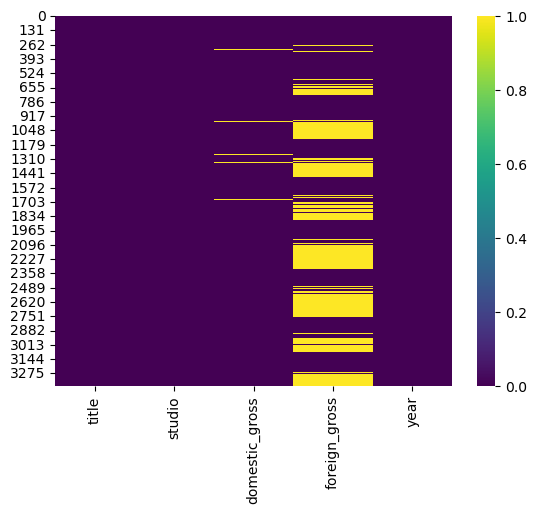

In [ ]:
sns.heatmap(data.isnull(),cmap='viridis')

## Data Cleaning - Box Office Mojo 

* Dealing with NaN Values 

In [ ]:
# Convert the 'foreign_gross' column to a float data type
data['foreign_gross'] = pd.to_numeric(data['foreign_gross'], errors='coerce')

# fill missing values in foreign_gross column with zero
data['foreign_gross'] = data['foreign_gross'].fillna(0)

# add domestic_gross and foreign_gross columns to create total_gross column
data['total_gross'] = data['domestic_gross'] + data['foreign_gross']

# # Fill missing values in the 'studio' column with a string, such as 'Unknown'
data['studio'].fillna('Unknown', inplace=True)

# # Fill missing values in the 'domestic_gross' column with the median of the available values
data['domestic_gross'].fillna(data['domestic_gross'].median(), inplace=True)

# # Fill missing values in the 'total_gross' column with median of the available values
data['total_gross'].fillna(data['total_gross'].median(), inplace=True)

# Change total_gross column to a float data type
data['total_gross'] = pd.to_numeric(data['total_gross'], errors='coerce')

In [ ]:
data.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


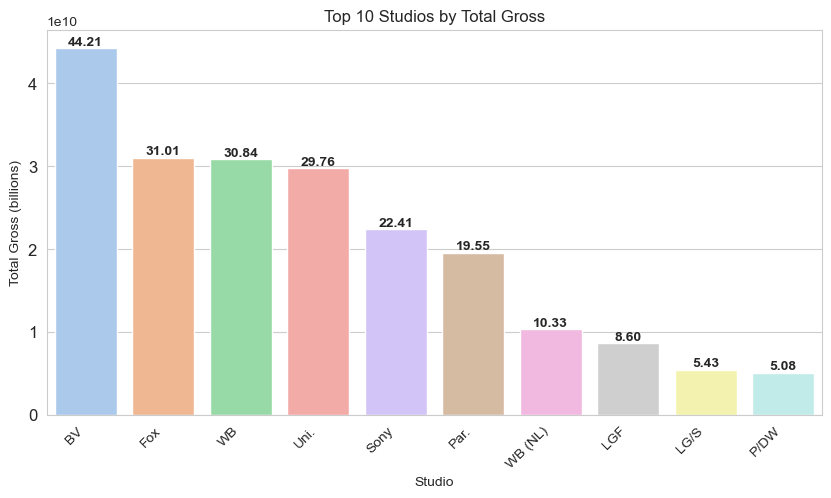

In [ ]:

# Group the data and sum the total gross for each studio
studio_totals = data.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10)

# Create the plot using Seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=studio_totals.index, y=studio_totals.values)

sns.color_palette("tab10")

# Add labels and formatting
ax.set_title('Top 10 Studios by Total Gross')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Gross (billions)')
ax.set_xticklabels(studio_totals.index, rotation=45, ha='right')
ax.tick_params(axis='y', labelsize=12)
for i, v in enumerate(studio_totals.values):
    ax.text(i, v, f"{v/1e9:.2f}", ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

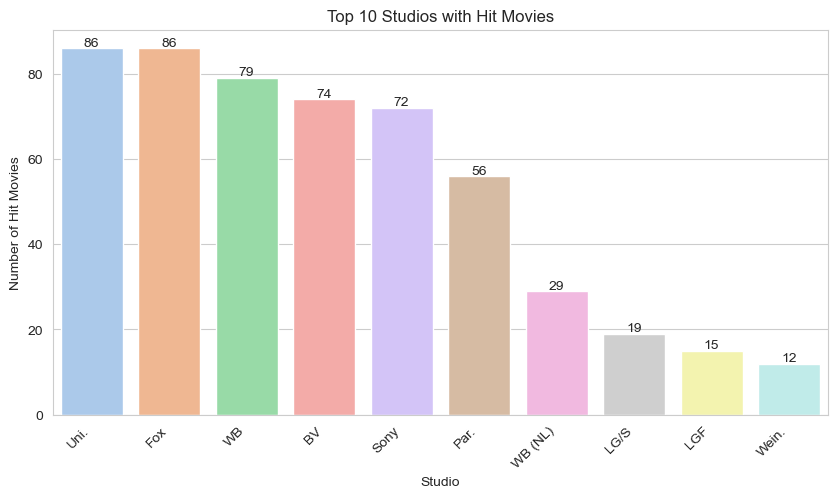

In [ ]:
# Hit movies are those that have grossed more than 100 million
data['hit'] = data['total_gross'].apply(lambda x: 1 if x > 100000000 else 0)
hit_movies = data[data['hit'] == 1]

# Group the hit movies by studio and calculate the number of hit movies per studio
studio_hit_counts = hit_movies.groupby('studio')['hit'].sum().sort_values(ascending=False).head(10)

# Create a bar plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=studio_hit_counts.index, y=studio_hit_counts.values)

sns.color_palette("tab10")

ax.set_title('Top 10 Studios with Hit Movies')
ax.set_xlabel('Studio')
ax.set_ylabel('Number of Hit Movies')
ax.set_xticklabels(studio_hit_counts.index, rotation=45, ha='right')
for i, v in enumerate(studio_hit_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()

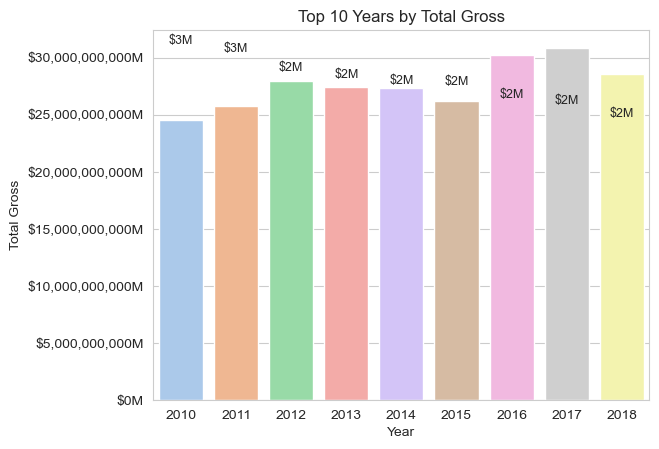

In [ ]:

# Group the data by year and total gross, and sum the values
yearly_gross = data.groupby('year')['total_gross'].sum().reset_index()

# Sort the values in descending order
yearly_gross = yearly_gross.sort_values('total_gross', ascending=False).head(10)

# Create a barplot with seaborn
ax = sns.barplot(x='year', y='total_gross', data=yearly_gross, palette='pastel')

# Add data labels above each bar
for i, v in enumerate(yearly_gross['total_gross']):
    ax.text(i, v + 0.01*v, f"${int(v/1e10)}M", ha='center', fontsize=9)

# Format y-axis ticks as millions
ax.yaxis.set_major_formatter('${x:,.0f}M')

# Set the title and axis labels
plt.title('Top 10 Years by Total Gross')
plt.xlabel('Year')
plt.ylabel('Total Gross')

# Show the plot
plt.show()

#Add average 

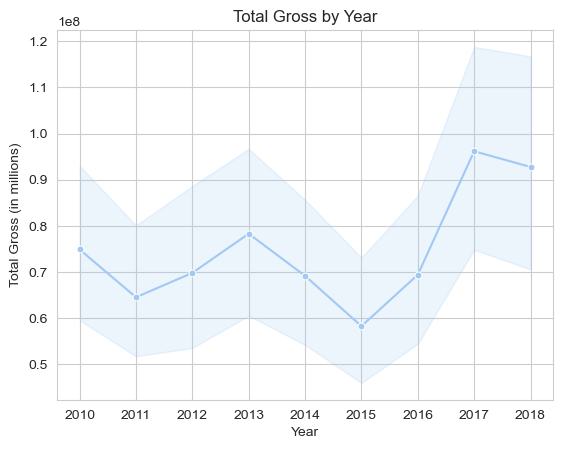

<Figure size 1000x500 with 0 Axes>

In [ ]:
# sns.lineplot(x="year", y="total_gross", data=data)

# Create a lineplot with seaborn
ax = sns.lineplot(x='year', y='total_gross', data=data, marker='o', markersize=5)

# Format x-axis ticks as integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the title and axis labels
plt.title('Total Gross by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross (in millions)')

# Set the size of the plot
plt.figure(figsize=(10, 5))

# Show the plot
plt.show()

## Data Base Overview  - IMDB

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


* The database has 8 tables 
* The following tables have the *movie_id* as the primary key (movie_basics,directors,known_for,movie_ratings, principals and writers).
* The *persons_id is* the primary key between ( persons, directors, writer and principal tables)

### 1. movie_basics Table 

In [ ]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [ ]:
# Checking for duplicates
movie_basics.duplicated().sum()


0

* The data had no duplicates 

In [ ]:
# Checking for null values
movie_basics.isnull().sum()
null_percent = movie_basics.isnull().mean().round(4) * 100
null_percent

movie_id            0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64

* The data has missing values in the following columns (*original_tittle* 0.01%,*genres* 3.7%, and *runtime_minutes* 21%)
* We will drop all the colums with NaN values 

In [ ]:
# dropping NaN Values 
movie_basics.dropna(inplace=True)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [ ]:
# checking table info
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


### 2. movie_ratings

In [ ]:
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [ ]:
# Checking for duplicates
movie_ratings.duplicated().sum()



0

In [ ]:
# Checking for null values
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [ ]:
#Join movie_basics and movie_ratings tables
movie_basics_ratings = pd.merge(movie_basics,movie_ratings,how='left')
movie_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11.0
112228,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
112230,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN


In [ ]:
# Checking for missing values
movie_basics_ratings.isnull().sum()

# dropping NaN Values
movie_basics_ratings.dropna(inplace=True)

# Checking table info
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 112227
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.5+ MB


In [ ]:
movie_basics_ratings.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
5,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451.0
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64.0
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120.0
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6.0


In [ ]:
movie_basics_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


* The average rating has a Max value of 10 showing that the rating scale was from 0 - 10

In [ ]:
#genres with highest average ratings
highest_r = movie_basics_ratings.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)
highest_r

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
Game-Show                      9.0
Drama,Short                    8.8
Documentary,News,Sport         8.8
Documentary,News,Reality-TV    8.8
Action,Adventure,Musical       8.7
Biography,History,Music        8.5
Adventure,Crime                8.5
Mystery,News,Thriller          8.4
Name: averagerating, dtype: float64

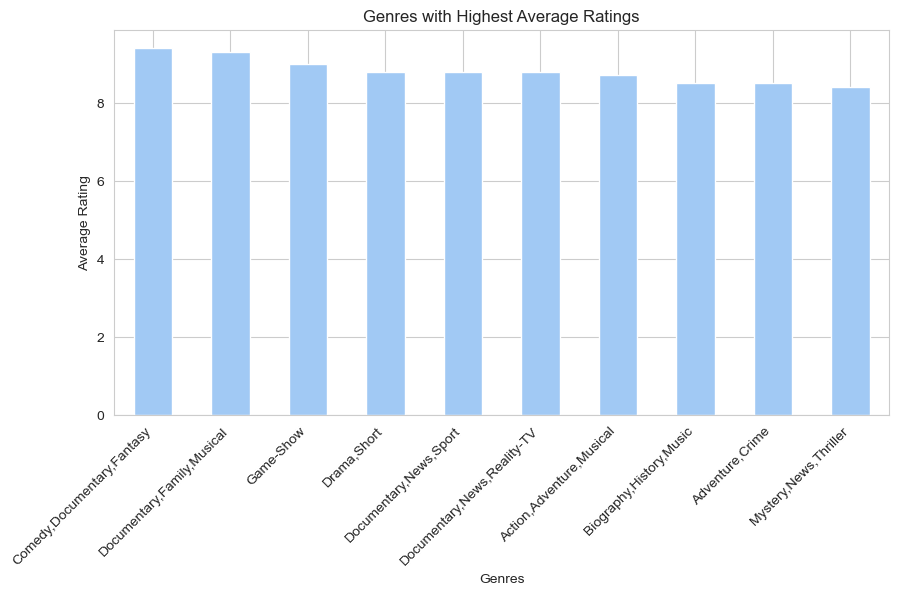

In [ ]:
# #plot of genres with highest average ratings
highest_r.plot(kind='bar',figsize=(10,5))

plt.title('Genres with Highest Average Ratings')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.show()


<AxesSubplot: xlabel='averagerating', ylabel='Count'>

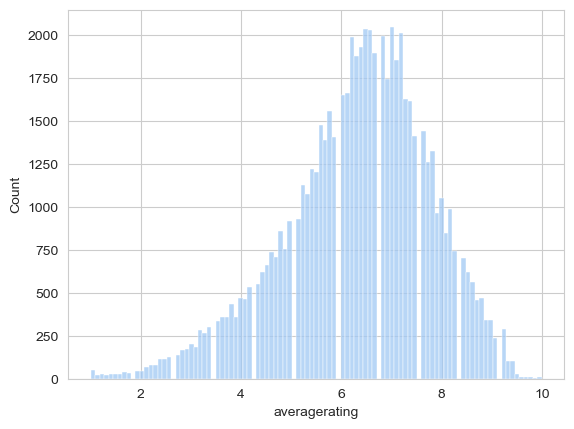

In [ ]:
import seaborn as sns

sns.histplot(x="averagerating", data=movie_basics_ratings)


# Data Overview - Movie Budgets 

In [ ]:
tn_movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [ ]:
# Importing the datetime module
from datetime import datetime

# Defining a function to extract the year from the date string
def extract_year(date_str):
    # Converting the date string to a datetime object
    date_obj = datetime.strptime(date_str, '%b %d, %Y')
    # Extracting the year from the datetime object
    year = date_obj.year
    # Returning the year as a string
    return str(year)

# Applying the function to the release_date column
tn_movie_budgets['release_year'] = tn_movie_budgets['release_date'].apply(extract_year)

# Checking the results
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [ ]:

# Removing the dollar sign from the numeric columns and converting them to numeric data types

tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

tn_movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,2017
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,2015


In [ ]:
#Add profit column to tn_movie_budgets 
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

#Add profit margin column to tn_movie_budgets
tn_movie_budgets['profit_margin'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']

tn_movie_budgets.head(10)



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,5.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,5.827114
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007,6.634204e+08,2.211401
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,1.186484
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,2015,5.796209e+08,1.932070


C:\Users\user\AppData\Local\Temp\ipykernel_13200\784997722.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(highest_profit['movie'], rotation=45, ha='right')


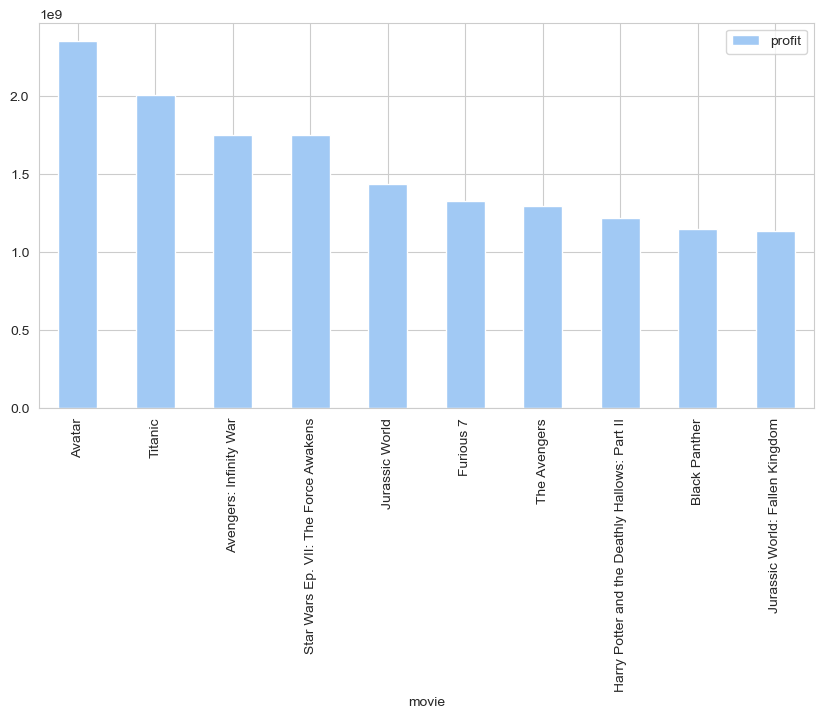

In [ ]:
# Top 10 movies with highest profit 
highest_profit = tn_movie_budgets.sort_values('profit', ascending=False).head(10)
highest_profit

# Plot of top 10 movies with highest profit
highest_profit.plot(kind='bar',x='movie',y='profit',figsize=(10,5))

# Add labels and formatting
ax.set_title('Top 10 Movies with Highest Profit')
ax.set_xlabel('Movie')
ax.set_ylabel('Profit (in millions)')
ax.yaxis.set_major_formatter('${x:.0f}M')
ax.set_xticklabels(highest_profit['movie'], rotation=45, ha='right')

# Show the plot
plt.show()

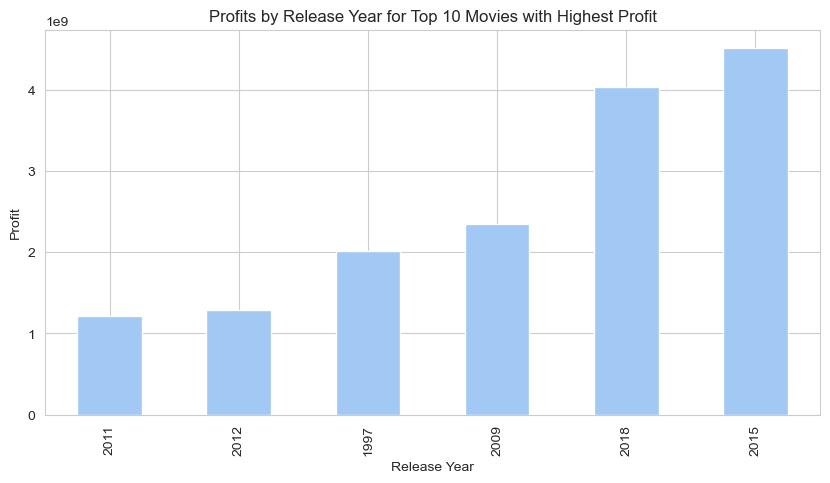

In [ ]:
#grouping profits by release year fot top 10 movies with highest profit
highest_profit.groupby('release_year')['profit'].sum().sort_values(ascending=False).head(10)

#plot of profits by release year for top 10 movies with highest profit aarranged by year assending
highest_profit.groupby('release_year')['profit'].sum().sort_values(ascending=True).plot(kind='bar',figsize=(10,5))

plt.title('Profits by Release Year for Top 10 Movies with Highest Profit')

plt.xlabel('Release Year')

plt.ylabel('Profit')

plt.show()
